# Introduction to Python programming for data journalism

## COMM3180 Spring 2026

### Instructor: Matt O'Donnell (mbod@asc.upenn.edu)


### Course Overview

* This notebook uses a dataset from OpenDataPhilly on vehicular crashes to demonstrate the range of analytic techniques and programming skills we will learn in this course.


------


# Why learn programming and data analysis skills for making stories from data?
## _Testing_ data in stories, <br/> _finding_ stories in data and <br/> _making_ stories from data

* In the era of _big data_ we frequently encounter stories in various forms of media that make assertions and claim to be based on the analysis of large datasets. It is often possible to access and analyze the data of relevance behind these stories. This allows us, for example, to test the claims, the focus and framing of a news article reporting. While there a number of online tools to explore and visualize open datasets, developing programming skills will allow you greater flexibility and the ability to filter, group and combine data in anticipated and unsupported ways.


* As more and more data is available it becomes vital for more people to acquire and spread the skills for handling these data beyond just a handful of data storytelling experts and media sources. There has been lots of discussion of _open data_ and _data democratization_ (both within private and public realms) espousing the benefits of making data available to "everyone" beyond its traditional management and analysis by IT departments and statisticians. One element of this is making the data available and easily accessible. But equally (if not _more_ ) important than this is having ability to analytically handle these datasets. While it would be a mistake to suggest that learning programming __and__ data analysis is a trivial or quick thing to do. It is certainly not beyond the reach of motivated individuals and there are many resources available to teach programming languages, such as Python and R. One might even argue that it is the responsibility of modern citizens to become data literate and this should include acquiring some basic data analysis and programming skills.


* Having the ability to acquire, analyze and to discover and interpret patterns in data means that more stories can be told beyond the core of those selected by traditional media sources for broad appeal, political, commercial and other reasons.


* As students of communication theory we know that effective and persuasive communication is not just about sharing the right (or true) information but also about how you select from, order and present (frame) this information. This becomes all the more crucial as the amount data increases. A fundamental skill for telling stories from data is first being able to identify the stories __in__ data. These might be found by describing and summarizing what is there, identifying trends over time or in making comparisons between different groups, categories and factors, and so on. These stories in data then become the components of the larger story you can tell from the data.


* Data journalism or data storytelling requires skills in:
    * some programming 
    * data analysis and visualization
    * identifying patterns (stories) in data 
    * telling stories from these patterns





# Example: Analyzing vehicular crash data for Philadelphia 2005-2025

* The remainder of this notebook will work through an example of exploring and analyzing an open public dataset using `pandas`, the core Python tool we will learn in this class. It works through the key steps:
    1. Acquiring and loading a dataset
    2. Inspecting and understanding the data 
    3. Looking at metadata and turning data into information
    4. Exploring the relevant and interesting components of the dataset
    5. Grouping and associating the data to find patterns and trends
    6. Communicating these insights in an engaging story.

  We will return to and practice these steps again and again in this course.


* Here we make use of data made available on www.opendataphilly.org 

  ![](img/openphilly.png)

* The particular dataset is derived from the annual crash data compiled by Penn DOT for Pennsylvania.
   * https://www.opendataphilly.org/dataset/vehicular-crash-data
  ![](img/penndot.png)   



### 0. Setup notebook

* The first Python code in a notebook should include all the modules and functions that you need to use for the analysis. These are grouped together at the top and not scattered throughout the notebook to make it clearer and more reproducible.


* For data analysis we are going to use a popular and powerful code library called `pandas` (https://pandas.pydata.org/) that provides data structures and functionality optimized for data analysis and particularly for working with data in the form of a table.

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import camelot
import calendar
import re
import matplotlib.pyplot as plt

### 1. Load the data

* We will look at some of the most common data formats used to store data in files. Here we have downloaded the **CSV** (*comma separated value*) format version of the vehicular crash data. 


* Here is a subset of the data with 7 recorded crashes and a small handful of the features recorded about each crash:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th>day_of_week</th>      <th>county_name</th>      <th>collision_type</th>      <th>dec_lat</th>      <th>dec_long</th>    </tr>  </thead>  <tbody>    <tr>      <td>3</td>      <td>Philadelphia</td>      <td>1</td>      <td>40.0446</td>      <td>-75.0547</td>    </tr>    <tr>      <td>5</td>      <td>Philadelphia</td>      <td>4</td>      <td>39.9693</td>      <td>-75.1432</td>    </tr>    <tr>      <td>7</td>      <td>Philadelphia</td>      <td>4</td>      <td>40.0490</td>      <td>-75.0707</td>    </tr>    <tr>      <td>6</td>      <td>Philadelphia</td>      <td>6</td>      <td>39.9034</td>      <td>-75.1504</td>    </tr>    <tr>      <td>4</td>      <td>Philadelphia</td>      <td>1</td>      <td>40.0512</td>      <td>-74.9892</td>    </tr>    <tr>      <td>6</td>      <td>Philadelphia</td>      <td>8</td>      <td>39.9352</td>      <td>-75.1542</td>    </tr>    <tr>      <td>4</td>      <td>Philadelphia</td>      <td>4</td>      <td>40.0811</td>      <td>-75.0391</td>    </tr>  </tbody></table>


* The CSV format is a simple text format organized with one line for each instance (i.e. a crash) and each feature or data point about the crash (i.e. number of people involved, time of day, kind of injuries, etc.) is separated by a comma. The first line of the file usually contains the names of features. 


* A CSV representation of the table above is:

```
day_of_week,county_name,collision_type,dec_lat,dec_long
3,Philadelphia,1,40.0446,-75.0547
5,Philadelphia,4,39.9693,-75.1432
7,Philadelphia,4,40.049,-75.0707
6,Philadelphia,6,39.9034,-75.1504
4,Philadelphia,1,40.0512,-74.9892
6,Philadelphia,8,39.9352,-75.1542
4,Philadelphia,4,40.0811,-75.0391
```

#### _Key point and observations_

* A **fundamental point** to take on right at the beginning is that it is here in things a mundane as the data format that we begin to look for the stories in data. It is easy to rush through the steps of acquiring and loading a big data set in order to push it through a data analysis and visualization pipeline or tool, without stopping to think about what each row and column represents. 

    * Here _each row is an incidence of a crash_, which for the individuals involved is a major and serious life event and sadly perhaps a life threatening or life ending event. This event is a story located a particular time and place. 
    * Then the columns represent the _potential narrative foci_ as we begin to group together one, two, ten, 300, thousands of these crash incidents. We can begin to formulate these as questions:
        * What times of day do crashes most often occur?
        * Are there particularly intersections where a lot of crashes occur?
        * When a bicycle is involved are the injuries more serious then two or more cars?

### Load the data

* We use the `pd.read_csv()` function to read the data from the CSV file into a data structure called a __data frame__. 


* A data frame is a table structure with:
    * `Rows` (each line in the CSV file, i.e. a crash)
    * `Columns` (each of the features recorded in the CSV file about crashes)
    * `An index` (a unique way of identifying and accessing each of the rows)

In [2]:
crash_data = pd.read_csv('data/PDOT_crash_data_2005_2024.csv', low_memory=False)

### 2. Inspect the data

* The first step is always to try to get a sense of the size (dimensions), type and quality of the data.


* Key questions include:
    * How many rows (observations) does it have?

    * How many columns (different types of features) are there?

    * How comprehensive and varied are these features across the dataset?
        * For example, there may be a column that records whether a deer is involved in the crash. But for Philadelphia city crashes this is likely to most often be 0 or not recorded. And it is therefore probably not the story we are going to tell!

    * Are there missing values?
    
    
* A pandas `DataFrame` is a Python __OBJECT__ that has:
    * **attributes** - sequences of data
    * **functions** - sets of operations or steps that can be applied to these data
 
 (do not worry about this terminology or what it means at the moment!)
 
 
* The `.shape` attribute gives the dimensions of the `DataFrame` and reports the number of rows first, followed by the number of columns.

In [3]:
crash_data.shape

(691069, 99)

#### _Key point_

* So we have almost 700,000 accidents involving vehicles recorded in a 19 year period. 
    * That is a large number! 
    * There are stories to be told.
    * Don't forget the human side of what these numbers represent.
    
    
* There are 99 columns. So each crash incident had a range of features noted. Understanding what these features are is vital to being able to find the stories in the data.
    
#### Doing some visual data inspection 
 
 
* The size of the data necessitates that we approach it computationally and quantitatively, that is, we cannot try and read it row by row! However, it is good practice to do some visual spot checks as a way to familiarize yourself with the data.


* Pandas `DataFrame`s have various functions for this:
    1. `.head()` will display the first `n` rows of the data frame (default n=5).
    2. `.tail()` will display the last `n` rows of the data (default n=5).
    3. `.sample(n)` will select a random sample of `n` rows of the data.

In [4]:
crash_data.head()

,CRN,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,...,WORK_ZONE_LOC,WORK_ZONE_TYPE,WZ_CLOSE_DETOUR,WZ_FLAGGER,WZ_LAW_OFFCR_IND,WZ_LN_CLOSURE,WZ_MOVING,WZ_OTHER,WZ_SHLDER_MDN,WZ_WORKERS_INJ_KILLED
0,2005000003,NaN,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005000044,NaN,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005000073,NaN,2,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005001018,NaN,2,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005001021,NaN,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Notice that because there are 100 columns in the data frame only the first and last ten are displayed (`...` indicates where the other 70 are).


* By default the columns are shown in the order they appear in the underlying CSV file.

In [5]:
crash_data.tail()

,CRN,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,...,WORK_ZONE_LOC,WORK_ZONE_TYPE,WZ_CLOSE_DETOUR,WZ_FLAGGER,WZ_LAW_OFFCR_IND,WZ_LN_CLOSURE,WZ_MOVING,WZ_OTHER,WZ_SHLDER_MDN,WZ_WORKERS_INJ_KILLED
691064,2025030047,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
691065,2025030596,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
691066,2025031303,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
691067,2025031608,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
691068,2025031769,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# return a random sample of rows
crash_data.sample(10)

,CRN,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,...,WORK_ZONE_LOC,WORK_ZONE_TYPE,WZ_CLOSE_DETOUR,WZ_FLAGGER,WZ_LAW_OFFCR_IND,WZ_LN_CLOSURE,WZ_MOVING,WZ_OTHER,WZ_SHLDER_MDN,WZ_WORKERS_INJ_KILLED
275773,2012102585,NaN,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62336,2006109139,NaN,2,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235653,2011080277,NaN,3,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318998,2013134287,NaN,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127776,2008077372,NaN,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180308,2009133334,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301728,2013067991,930.0,3,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
667421,2024028660,1030.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
654674,2023101670,1619.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
533111,2019128325,NaN,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* The `head` and `tail` functions can also take an argument for the number of rows to return.

In [7]:
# show the first 20 rows

crash_data.head(20)

,CRN,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,...,WORK_ZONE_LOC,WORK_ZONE_TYPE,WZ_CLOSE_DETOUR,WZ_FLAGGER,WZ_LAW_OFFCR_IND,WZ_LN_CLOSURE,WZ_MOVING,WZ_OTHER,WZ_SHLDER_MDN,WZ_WORKERS_INJ_KILLED
0,2005000003,NaN,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005000044,NaN,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005000073,NaN,2,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005001018,NaN,2,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005001021,NaN,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2005001022,NaN,2,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2005001051,NaN,3,0,0,0,0,0,0,0,...,4.0,1.0,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
7,2005001066,NaN,3,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2005001552,NaN,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2005001782,NaN,2,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* We can also select a subset of columns by using column indexing and a list of column names

In [8]:
crash_data[['MUNICIPALITY','COUNTY', 'DISTRICT']].sample(20)

,MUNICIPALITY,COUNTY,DISTRICT
609505,15208,15,6
470681,23103,23,6
410873,67301,67,6
595258,15247,15,6
595418,67301,67,6
312409,15301,15,6
689142,46216,46,6
180613,23424,23,6
150335,9204,9,6
224956,23202,23,6


#### _Key point_

* The point is not so much the specific syntax and function you use but the importance of `eyeballing` the data to get a sense of what the various features/fields or variables contain.


* For instance:
    * The `MUNICIPALITY`, `COUNTY` and `DISTRICT` fields are numbers and not names as one might expect. So there must be a cross reference table somewhere that indicates the name of the district with code `6`, etc.
    * `TIME_OF_DAY` is an integer, e.g. `1515`, `0`, `742`, which we would initially assume is in 24 hour clock and relates to `3:15pm`,`12:00am` and `7:42am` respectively. Although a value of `0` might also be used to indicate an unknown time.
    * `DAY_OF_WEEK` is also a number. So must question whether `1` means Monday or Sunday.

#### List column names

* The `.columns` attribute of a pandas `DataFrame` is a list of the column names. Taken here from the first row of the CSV file.

In [9]:
crash_data.columns

Index(['CRN', 'ARRIVAL_TM', 'AUTOMOBILE_COUNT', 'BELTED_DEATH_COUNT',
       'BELTED_SUSP_SERIOUS_INJ_COUNT', 'BICYCLE_COUNT', 'BICYCLE_DEATH_COUNT',
       'BICYCLE_SUSP_SERIOUS_INJ_COUNT', 'BUS_COUNT', 'CHLDPAS_DEATH_COUNT',
       'CHLDPAS_SUSP_SERIOUS_INJ_COUNT', 'COLLISION_TYPE', 'COMM_VEH_COUNT',
       'CONS_ZONE_SPD_LIM', 'COUNTY', 'CRASH_MONTH', 'CRASH_YEAR',
       'DAY_OF_WEEK', 'DEC_LATITUDE', 'DEC_LONGITUDE', 'DISPATCH_TM',
       'DISTRICT', 'DRIVER_COUNT_16YR', 'DRIVER_COUNT_17YR',
       'DRIVER_COUNT_18YR', 'DRIVER_COUNT_19YR', 'DRIVER_COUNT_20YR',
       'DRIVER_COUNT_50_64YR', 'DRIVER_COUNT_65_74YR', 'DRIVER_COUNT_75PLUS',
       'EST_HRS_CLOSED', 'FATAL_COUNT', 'HEAVY_TRUCK_COUNT',
       'HORSE_BUGGY_COUNT', 'HOUR_OF_DAY', 'ILLUMINATION', 'INJURY_COUNT',
       'INTERSECTION_RELATED', 'INTERSECT_TYPE', 'LANE_CLOSED', 'LATITUDE',
       'LN_CLOSE_DIR', 'LOCATION_TYPE', 'LONGITUDE', 'MAX_SEVERITY_LEVEL',
       'MCYCLE_DEATH_COUNT', 'MCYCLE_SUSP_SERIOUS_INJ_COUNT',
 

#### Notice...

* Some of these names are more clear than others:
  * `MUNICIPALITY`, `CRASH_YEAR`, `CRASH_MONTH`, `DAY_OF_WEEK`, `TIME_OF_DAY`, `HOUR_OF_DAY`, all appear relatively self-explanatory
  * but what does `CRN` field mean?


* There are groups of related columns, e.g.
    * `DRIVER_COUNT_` is broken down into age bands instead of a single numeric column:
        * `DRIVER_COUNT_16yr`
        * `DRIVER_COUNT_17yr`
        * `DRIVER_COUNT_18yr`
        * `DRIVER_COUNT_19yr`
        * `DRIVER_COUNT_20yr`
        * `DRIVER_COUNT_50_64yr`
        * `DRIVER_COUNT_65_74yr`
        * `DRIVER_COUNT_75plus`
        
      but not continuous or equal ones.
      What does this suggest?
      
    * Injury types are broken down into categories
        * `BELTED_SUSP_SERIOUS_INJ_COUNT`
        * `BICYCLE_SUSP_SERIOUS_INJ_COUNT`
        * `CHLDPAS_SUSP_SERIOUS_INJ_COUNT`
        * `MCYCLE_SUSP_SERIOUS_INJ_COUNT`
        * `NONMOTR_SUSP_SERIOUS_INJ_COUNT`
        * `PED_SUSP_SERIOUS_INJ_COUNT`
        * `POSSIBLE_INJ_COUNT`
        * `SUSP_MINOR_INJ_COUNT`
        * `SUSP_SERIOUS_INJ_COUNT`
        * `TOT_INJ_COUNT`
        * `UNB_SUSP_SERIOUS_INJ_COUNT`
        * `UNK_INJ_DEG_COUNT`
        * `UNK_INJ_PER_COUNT`
        * `WZ_WORKERS_INJ_KILLED`
        
        <br/><br/>
* It is easier to look at these column names in alphabetical order to get a sense of what is recorded in the data about each crash incident.

In [10]:
crash_data.columns.sort_values()

Index(['ARRIVAL_TM', 'AUTOMOBILE_COUNT', 'BELTED_DEATH_COUNT',
       'BELTED_SUSP_SERIOUS_INJ_COUNT', 'BICYCLE_COUNT', 'BICYCLE_DEATH_COUNT',
       'BICYCLE_SUSP_SERIOUS_INJ_COUNT', 'BUS_COUNT', 'CHLDPAS_DEATH_COUNT',
       'CHLDPAS_SUSP_SERIOUS_INJ_COUNT', 'COLLISION_TYPE', 'COMM_VEH_COUNT',
       'CONS_ZONE_SPD_LIM', 'COUNTY', 'CRASH_MONTH', 'CRASH_YEAR', 'CRN',
       'DAY_OF_WEEK', 'DEC_LATITUDE', 'DEC_LONGITUDE', 'DISPATCH_TM',
       'DISTRICT', 'DRIVER_COUNT_16YR', 'DRIVER_COUNT_17YR',
       'DRIVER_COUNT_18YR', 'DRIVER_COUNT_19YR', 'DRIVER_COUNT_20YR',
       'DRIVER_COUNT_50_64YR', 'DRIVER_COUNT_65_74YR', 'DRIVER_COUNT_75PLUS',
       'EST_HRS_CLOSED', 'FATAL_COUNT', 'HEAVY_TRUCK_COUNT',
       'HORSE_BUGGY_COUNT', 'HOUR_OF_DAY', 'ILLUMINATION', 'INJURY_COUNT',
       'INTERSECTION_RELATED', 'INTERSECT_TYPE', 'LANE_CLOSED', 'LATITUDE',
       'LN_CLOSE_DIR', 'LOCATION_TYPE', 'LONGITUDE', 'MAX_SEVERITY_LEVEL',
       'MCYCLE_DEATH_COUNT', 'MCYCLE_SUSP_SERIOUS_INJ_COUNT',
 

### 3. Looking at the data dictionary/code book

* Most datasets that have been made publicly available should have an accompanying code book or data dictionary to describe what each of the fields mean. How they were collected. What units they are measured in. What data type has been used to record them (e.g. text vs number vs date).


* For this dataset there are a couple of versions:
    * The Metadata reources on phila.gov site: 
      - https://metadata.phila.gov/index.html#home/?view_280_search=crash&view_280_page=1
      - You can see there have been a number of different subsets of the data released over the years:
        - https://metadata.phila.gov/index.html#home/datasetdetails/5543865420583086178c4eba/
    * The PennDot data dictionary linked from this page:
        * https://experience.arcgis.com/experience/51809b06e7b140208a4ed6fbad964990/page/District#data_s=id%3AdataSource_1-196447a967d-layer-68%3A321
        * Data Dictionary - https://gis.penndot.pa.gov/gishub/crashZip/Crash_Data_Dictionary_2025.pdf
        * [That PDF file](Crash_Data_Dictionary_2025.pdf) is in this folder and you should make sure to review it.
        
        
* We've extracted the key information and put it into a CSV file, which means we can load it into a Pandas dataframe.

In [11]:
data_dictionary = pd.read_csv('data/data_dictionary.csv')

In [12]:
data_dictionary

,Column_Name,Description,Type,Length,Constraints
0,ARRIVAL_TM,Time police arrived at the scene,TEXT,4.0,HHMM
1,AUTOMOBILE_COUNT,Total amount of Automobiles Involved,NUMBER,2.0,NaN
2,BELTED_DEATH_COUNT,Total Deaths of belted occupants,NUMBER,2.0,NaN
3,BELTED_SUSP_SERIOUS_INJ_COUNT,Total Suspected Serious Injuries of belted occ...,NUMBER,2.0,NaN
4,BICYCLE_COUNT,Total amount of Bicycles involved,NUMBER,2.0,NaN
...,...,...,...,...,...
94,WZ_LN_CLOSURE,Did Work zone have a lane closure?,TEXT,1.0,"1=Y, 0 = N"
95,WZ_MOVING,Was there moving work in the zone?,TEXT,1.0,"1=Y, 0 = N"
96,WZ_OTHER,Was this a special type of work zone?,TEXT,1.0,"1=Y, 0 = N"
97,WZ_SHLDER_MDN,Was a median/shoulder in the zone?,TEXT,1.0,"1=Y, 0 = N"


* This tells us that the `crn` field is actually the `Crash Record Number`:

In [13]:
data_dictionary.set_index('Column_Name').loc['CRN']

Description                                  Crash Record Number
Type                                                      NUMBER
Length                                                       2.0
Constraints    Database key field that\ridentifies a unique c...
Name: CRN, dtype: object

### 4. Describing the data

* The next step is to start to look at the values and distributions in various columns/fields


* We can select a specific column or sets of columns using __INDEXING__. There are various ways to do this in a Pandas `DataFrame`. Most often it is clearest to use the column name.

In [14]:
data_dictionary.set_index('Column_Name').loc['FATAL_COUNT']

Description    Total amount of fatalities involved
Type                                        NUMBER
Length                                         2.0
Constraints                                    NaN
Name: FATAL_COUNT, dtype: object

In [15]:
crash_data['FATAL_COUNT']

0         0
1         0
2         0
3         1
4         0
         ..
691064    0
691065    0
691066    0
691067    0
691068    0
Name: FATAL_COUNT, Length: 691069, dtype: int64

* We might immediately be tempted to try and visualize this distribution with some kind of plot. And Pandas includes some nice easy ways to do this that we will learn about.

<Axes: >

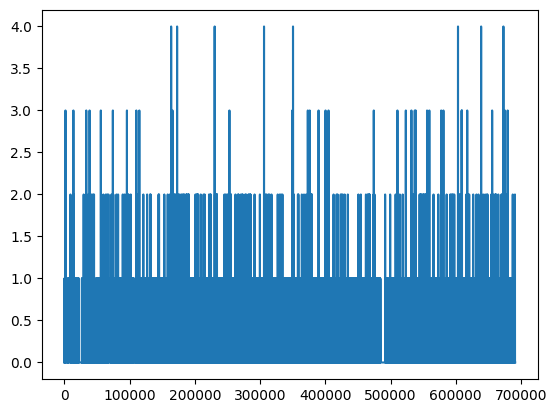

In [16]:
crash_data['FATAL_COUNT'].plot()

#### BUT!

* We should also stop and think about what we are looking for and what story or stories we anticipate in the values before diving straight into charts and graphs. Here Python is attemping to plot each of the  77462 rows in the data frame along the x-axis with the height on the y-axis representing the number of fatalities.


* This plot isn't particularly enlightening or clear. The resolution of this plot makes it seem like the majority of incidents had at least one fatality. This misleading because as we see below less than 1% of crash incidents resulted in a fatality. If we stretch the plot on the x-axis (by changing the aspect ration of the plot) it becomes a little clearer that the points with a value of `1` are more sparse than it at first appeared.




<Axes: >

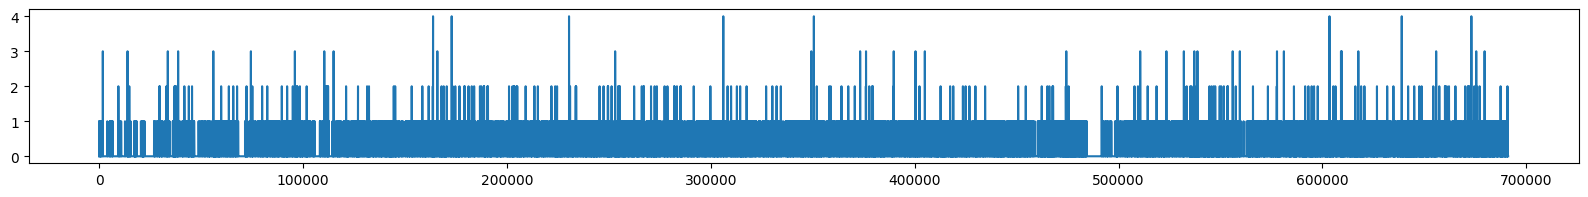

In [17]:
crash_data['FATAL_COUNT'].plot(figsize=(20,2))

* Even with this change, the plot gives the wrong impression of the proportion of incidents involving a fatality.


* Having said that, it can be warranted to try and visualize every instance (all the rows) like this. And sometimes a picture will give you insight that it difficult to get from a table.


* Here we can see that most crashes fortunately did not include fatalities. And that only a two in a 10 year period resulted in 4 deaths in a single crash.


* And compare the plot with this simple table, which tallies the number of rows that contain each number of fatalities.

In [18]:
crash_data['FATAL_COUNT'].value_counts()

FATAL_COUNT
0    685996
1      4825
2       207
3        33
4         8
Name: count, dtype: int64

The `.value_counts()` function applied to a column provides a tally of the number of rows that have each of the range of existing values for the column.


Here we see five possible values for the number of fatalites: 0, 1, 2, 3 or 4 and the number of times each value occurs in a row in the data.


We might also want to see these counts expressed as proportions of the total number of rows:

In [19]:
crash_data['FATAL_COUNT'].value_counts(normalize=True)

FATAL_COUNT
0    0.992659
1    0.006982
2    0.000300
3    0.000048
4    0.000012
Name: proportion, dtype: float64

* We will learn about a number of other ways to summarize the values in a column of a data frame. 


* Where the values are interval or continuous numbers the `.describe()` function gives a standard statistical summary. 

In [20]:
crash_data['FATAL_COUNT'].describe()

count    691069.000000
mean          0.007771
std           0.093460
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: FATAL_COUNT, dtype: float64

* We will also spend time looking a __DATA TYPES__ where they are relevant and might affect our data analysis.


* For instance, the `CRASH_YEAR` field gets treated by Pandas as an _integer_ (i.e. whole number) field.

In [21]:
crash_data['CRASH_YEAR'].head()

0    2005
1    2005
2    2005
3    2005
4    2005
Name: CRASH_YEAR, dtype: int64

* So while the `.value_counts()` function will gives us a useful summary:

In [22]:
crash_data['CRASH_YEAR'].value_counts()

CRASH_YEAR
2005    38099
2006    37759
2007    37603
2016    37090
2018    36327
2017    36218
2019    36044
2015    35934
2008    34801
2011    34709
2012    34695
2013    34578
2009    34418
2010    34141
2014    33834
2021    33236
2022    31753
2023    30416
2020    29751
2024    29663
Name: count, dtype: int64

* If we use the `.describe()` method then we'll get some strange results

In [23]:
crash_data['CRASH_YEAR'].describe()

count    691069.000000
mean       2014.211430
std           5.720413
min        2005.000000
25%        2009.000000
50%        2014.000000
75%        2019.000000
max        2024.000000
Name: CRASH_YEAR, dtype: float64

* The _mean_ or average year in the dataset is `2014.211430` - which makes little sense at all!


* We want to check the range of years involved - from `min` and `max` we see `2005` and `2024`
> Don't always trust filenames or descriptions. __CHECK THE DATA YOURSELF__.


* We need to tell Pandas to treat the year values as _categories_. 

In [24]:
crash_data['CRASH_YEAR'].astype('category').head(15)

0     2005
1     2005
2     2005
3     2005
4     2005
5     2005
6     2005
7     2005
8     2005
9     2005
10    2005
11    2005
12    2005
13    2005
14    2005
Name: CRASH_YEAR, dtype: category
Categories (20, int64): [2005, 2006, 2007, 2008, ..., 2021, 2022, 2023, 2024]

* And now the results of using `.describe()` are more sensible and useful.

In [25]:
crash_data['CRASH_YEAR'].astype('category').describe()

count     691069
unique        20
top         2005
freq       38099
Name: CRASH_YEAR, dtype: int64

* We get a more appropriate summary of the `CRASH_YEAR` variable as **CATEGORICAL**
  - There are 20 different values (years recorded in the dataset)


### 5. Grouping and aggregating the data

* The next step is often to group and subset a dataset according to certain fields, such as `CRASH_YEAR`.


* Again Pandas gives us different ways to do this that we learn about.


* The `.groupby(FIELD)` function will split a single `DataFrame` into a number of different ones based on the values of the grouping field or fields.
    * Here we cam see the shape of each of the resulting dataframes by `CRASH_YEAR`

In [26]:
for year, ydf in crash_data.groupby('CRASH_YEAR'):
    print(year, ydf.shape)

2005 (38099, 99)
2006 (37759, 99)
2007 (37603, 99)
2008 (34801, 99)
2009 (34418, 99)
2010 (34141, 99)
2011 (34709, 99)
2012 (34695, 99)
2013 (34578, 99)
2014 (33834, 99)
2015 (35934, 99)
2016 (37090, 99)
2017 (36218, 99)
2018 (36327, 99)
2019 (36044, 99)
2020 (29751, 99)
2021 (33236, 99)
2022 (31753, 99)
2023 (30416, 99)
2024 (29663, 99)


<Axes: xlabel='CRASH_YEAR'>

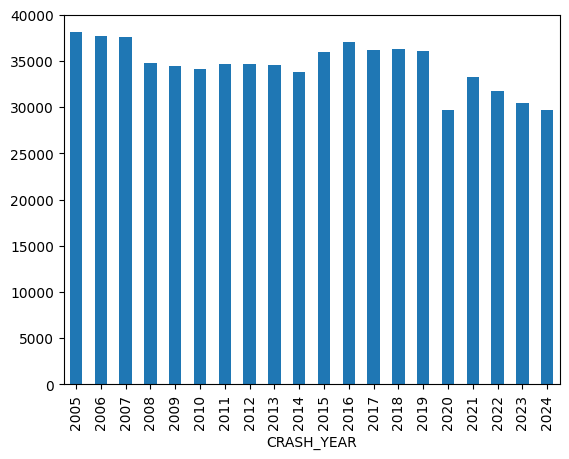

In [27]:
crash_data.groupby('CRASH_YEAR')['CRN'].count().plot(kind='bar')

* So we seem to have a relatively even number of crash events in each year. That is, there are no spikes or troughs and no clear increasing or describe trends.


* We could calculate the average number of crash events per year from 2005 to 2024:

In [28]:
avg_crash_per_year=crash_data.groupby('CRASH_YEAR').size().mean()
avg_crash_per_year

np.float64(34553.45)

* So on average across the period 2005 to 2024 there were 34553.45 crash incidents recorded each year.


* There will be some variability year by year and we could explore that with another version of the bar plot where bars are colored purple if there were less incidents than the average and green if there were more during each year.

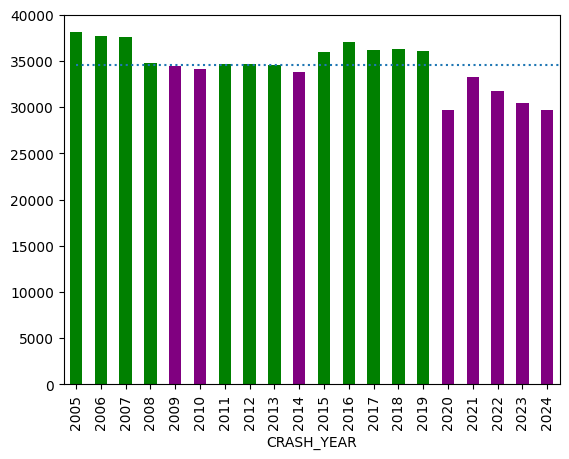

In [29]:
above_mean=np.where(crash_data.groupby('CRASH_YEAR').size()>avg_crash_per_year, 'green', 'purple')

crash_data.groupby('CRASH_YEAR').size().plot(kind='bar', color=above_mean)
plt.hlines(y=avg_crash_per_year, xmin=0, xmax=20, linestyle='dotted')

* So there were a lower number of incidents than average in 2011, 2014 and 2017. Note that for this kind of analysis and visualization 


* We can group by more than one field and then get a count of the number of rows in each combination of, for example, `CRASH_YEAR` and `CRASH_MONTH`

In [30]:
crash_data.groupby(['CRASH_YEAR','CRASH_MONTH']).count()

CRN  ARRIVAL_TM  AUTOMOBILE_COUNT  \
CRASH_YEAR CRASH_MONTH                                       
2005       1            3118           1              3118   
           2            2865           1              2865   
           3            2814           4              2814   
           4            3116           2              3116   
           5            3347           0              3347   
...                      ...         ...               ...   
2024       8            2292        1918              2292   
           9            2322         421              2322   
           10           2831         879              2831   
           11           2684         822              2684   
           12           2722        1061              2722   

                        BELTED_DEATH_COUNT  BELTED_SUSP_SERIOUS_INJ_COUNT  \
CRASH_YEAR CRASH_MONTH                                                      
2005       1                          3118                           3118   
           2                          2865                           2865   
           3                          2814                           2814   
           4                          3116                           3116   
           5                          3347                           3347   
...                                    ...                            ...   
2024       8                          2292                           2292   
           9                          2322                           2322   
           10                         2831                           2831   
           11                         2684                           2684   
           12                         2722                           2722   

                        BICYCLE_COUNT  BICYCLE_DEATH_COUNT  \
CRASH_YEAR CRASH_MONTH                                       
2005       1                     3118                 3118   
           2                     2865                 2865   
           3                     2814                 2814   
           4                     3116                 3116   
           5                     3347                 3347   
...                               ...                  ...   
2024       8                     2292                 2292   
           9                     2322                 2322   
           10                    2831                 2831   
           11                    2684                 2684   
           12                    2722                 2722   

                        BICYCLE_SUSP_SERIOUS_INJ_COUNT  BUS_COUNT  \
CRASH_YEAR CRASH_MONTH                                              
2005       1                                      3118       3118   
           2                                      2865       2865   
           3                                      2814       2814   
           4                                      3116       3116   
           5                                      3347       3347   
...                                                ...        ...   
2024       8                                      2292       2292   
           9                                      2322       2322   
           10                                     2831       2831   
           11                                     2684       2684   
           12                                     2722       2722   

                        CHLDPAS_DEATH_COUNT  ...  WORK_ZONE_LOC  \
CRASH_YEAR CRASH_MONTH                       ...                  
2005       1                           3118  ...             20   
           2                           2865  ...             26   
           3                           2814  ...             29   
           4                           3116  ...             45   
           5                           3347  ...             49   
...                                     ..

* This is a little verbose as it shows these counts for all the columns.


* We can select a single column or group of columns of interest and then sum up the numbers in them.


* For example, here are the numbers of bicycles involved in crashes by year and month.

In [31]:
crash_data.groupby(['CRASH_YEAR','CRASH_MONTH'])['BICYCLE_COUNT'].sum()

CRASH_YEAR  CRASH_MONTH
2005        1              13
            2              12
            3              19
            4              63
            5              67
                           ..
2024        8               0
            9               0
            10              0
            11              0
            12              0
Name: BICYCLE_COUNT, Length: 240, dtype: int64

* This really does lend itself to a visualization to help us look for trends and patterns.

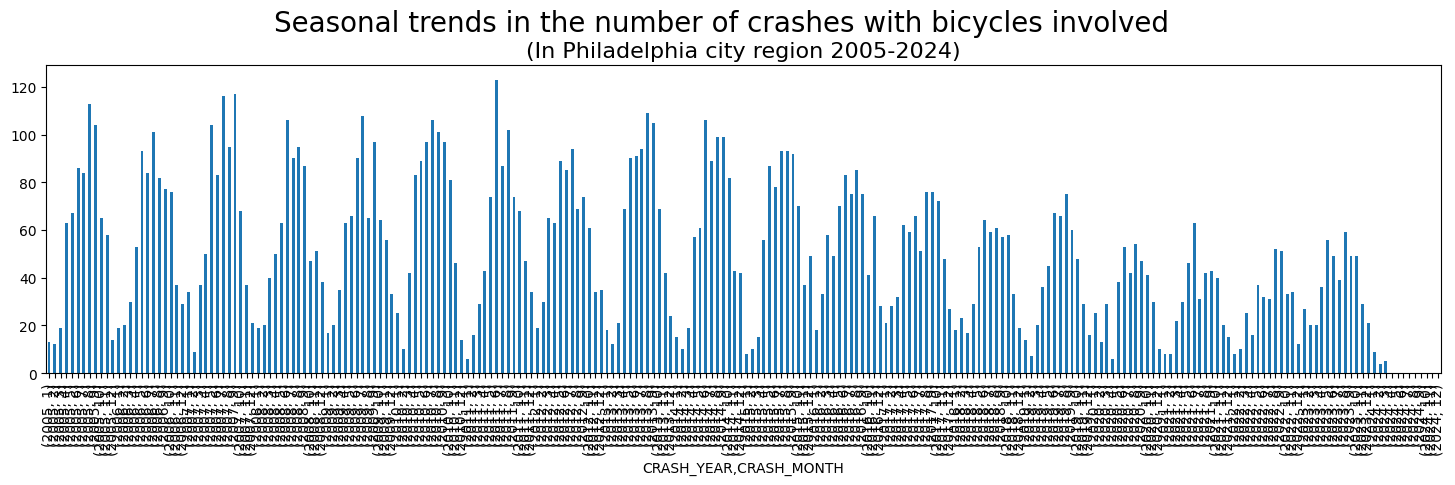

In [32]:
plt.figure(figsize=(18,4))
crash_data.groupby(['CRASH_YEAR','CRASH_MONTH'])['BICYCLE_COUNT'].sum().plot(kind='bar')
plt.suptitle('Seasonal trends in the number of crashes with bicycles involved', 
             fontsize=20, y=1.02)
plt.title('(In Philadelphia city region 2005-2024)', fontsize=16)
plt.show()

* Look carefully at the axes in any plot you create.
   * Here each point on the x-axis represents a month particular year, e.g. `2011,1` means January 2011 and `2013,4` means March 2013.
   * The y-axis shows the number of incidents and starts from zero.



In [33]:
crash_data.groupby(['CRASH_YEAR','CRASH_MONTH'])['BICYCLE_COUNT'].sum()

CRASH_YEAR  CRASH_MONTH
2005        1              13
            2              12
            3              19
            4              63
            5              67
                           ..
2024        8               0
            9               0
            10              0
            11              0
            12              0
Name: BICYCLE_COUNT, Length: 240, dtype: int64

In [34]:
crash_year_month_counts = crash_data.groupby(['CRASH_YEAR','CRASH_MONTH'])['BICYCLE_COUNT'].sum().unstack()
crash_year_month_counts

CRASH_MONTH,1,2,3,4,5,6,7,8,9,10,11,12
CRASH_YEAR,,,,,,,,,,,,
2005,13,12,19,63,67,86,84,113,104,65,58,14
2006,19,20,30,53,93,84,101,82,77,76,37,29
2007,34,9,37,50,104,83,116,95,117,68,37,21
2008,19,20,40,50,63,106,90,95,87,47,51,38
2009,17,20,35,63,66,90,108,65,97,64,56,33
2010,25,10,42,83,89,97,106,101,97,81,46,14
2011,6,16,29,43,74,123,87,102,74,68,47,34
2012,19,30,65,63,89,85,94,69,74,61,34,35
2013,18,12,21,69,90,91,94,109,105,69,42,24


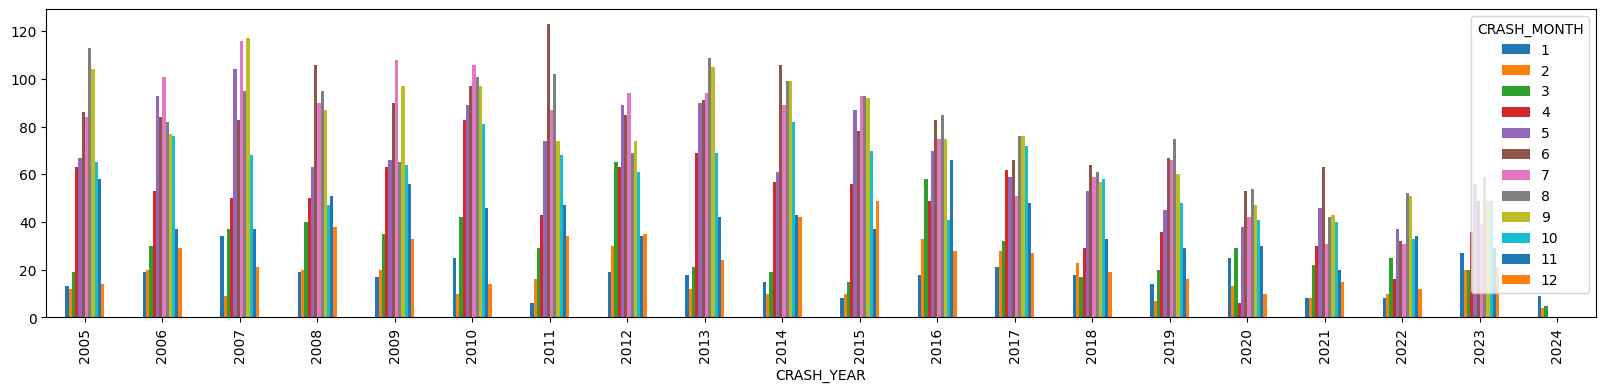

In [35]:
crash_year_month_counts.plot(kind='bar', figsize=(20,4))
plt.show()

#### _Key point_

* Look for patterns in your data!
  * These could be __TRENDS__ (an increase or descrease) or __CYCLES__ (repeated up and down patterns), etc.
  * These trends and cycles might be associated with other fields. Here is seems like we observe fewer bikes involved in crashes when the weather is colder.



* What about the time of day?

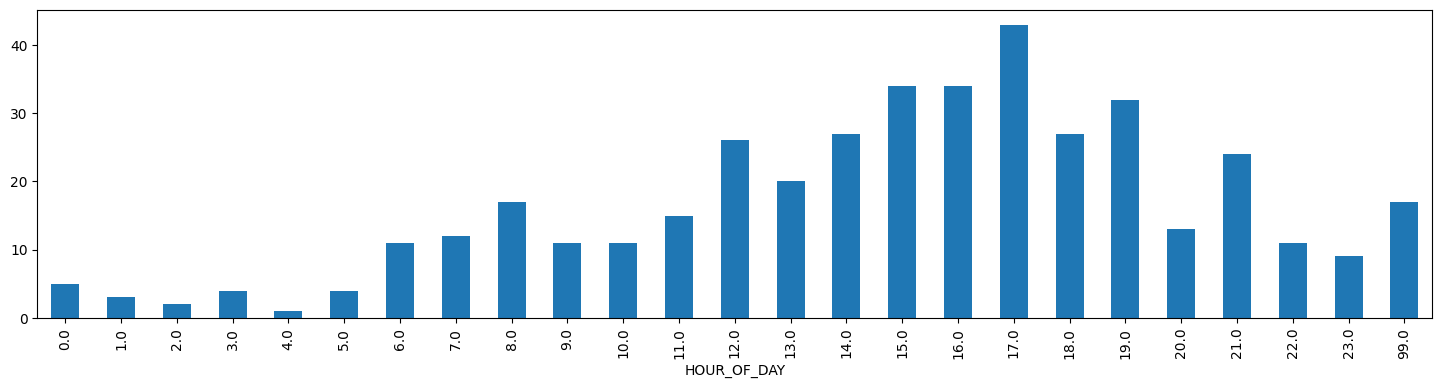

In [36]:
plt.figure(figsize=(18,4))
crash_data.groupby(['HOUR_OF_DAY'])['BICYCLE_COUNT'].sum().plot.bar()
plt.show()

* This plot shows bicycles involved in crashes grouped across all the data by the `HOUR_OF_DAY`


* Definitely seems like a _rush hour_ trend (`15-19`) that might be worth investigating.


* Notice also the number of `99` values. These probably indicate that the time of day was not recorded.

#### We'll finish off with a few other grouping and aggregating examples.


* Deaths of cyclists involved in crashes by year and month.

In [37]:
def format_xticklabels(plot):
    '''function to format (year, month) tick labels in a more readable format
    '''
    xticklabels = plot.get_xticklabels()
    new_labels = []
    for xtick in xticklabels:
        text = xtick.get_text()
        tmatch = re.match(r'\((20\d{2}), (\d{1,2})\)', text)
        mnum = int(tmatch.group(2))
        year = tmatch.group(1) if mnum==1 else ""
        mabbr = calendar.month_abbr[mnum]
        xtick.set_text(f'{year} {mabbr}')
        new_labels.append(xtick)
        
    return new_labels

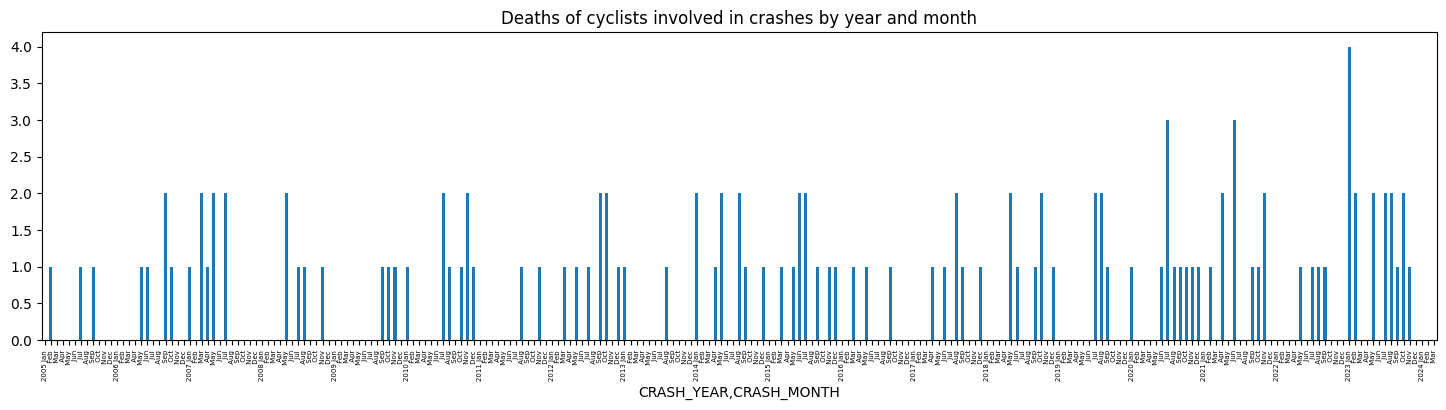

In [38]:
plt.figure(figsize=(18,4))
bike_crash = crash_data[crash_data['BICYCLE_COUNT']>0]
bcrash_plot=bike_crash.groupby(['CRASH_YEAR','CRASH_MONTH'])['FATAL_COUNT'].sum().plot(kind='bar', title='Deaths of cyclists involved in crashes by year and month')
bcrash_plot.set_xticklabels(format_xticklabels(bcrash_plot), fontsize=5)
plt.show()

* What is the distribution of fatalities across all types of incident?

In [39]:
crash_data['FATAL_COUNT'].value_counts()

FATAL_COUNT
0    685996
1      4825
2       207
3        33
4         8
Name: count, dtype: int64

<Axes: >

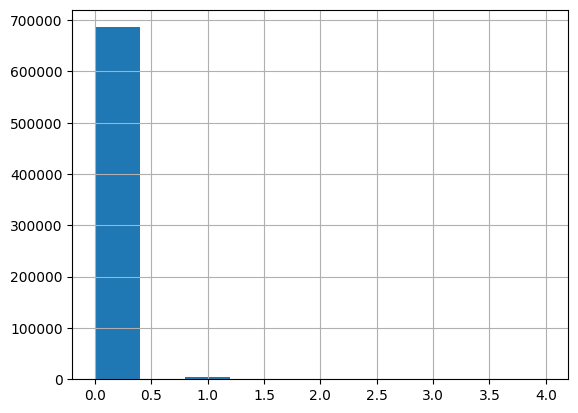

In [40]:
crash_data['FATAL_COUNT'].hist()

* Which shows where a table can be clearer than a simple plot.


* Subset the data to find incidents where there were exactly 2 fatalities.

In [41]:
crash_data[crash_data['FATAL_COUNT']==2]

,CRN,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,...,WORK_ZONE_LOC,WORK_ZONE_TYPE,WZ_CLOSE_DETOUR,WZ_FLAGGER,WZ_LAW_OFFCR_IND,WZ_LN_CLOSURE,WZ_MOVING,WZ_OTHER,WZ_SHLDER_MDN,WZ_WORKERS_INJ_KILLED
9476,2005138329,NaN,1,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13966,2005152082,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14822,2005156668,NaN,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29642,2005408344,NaN,2,2,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29732,2005408977,NaN,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674477,2024054035,1703.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
675621,2024058423,145.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
677073,2024064520,336.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687365,2024108261,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* So there were 29 crashes where 2 people lost their lives.


* Searching for stories in data will involve exploring the data fulling using these kinds of queries and making observations on the results.


![](img/bike_crash.png)

* Here are various summaries of the incidents involving bicycles.

In [42]:
# How many bicycle related (cyclists?) deaths were there?

crash_data['BICYCLE_DEATH_COUNT'].value_counts()

BICYCLE_DEATH_COUNT
0    690948
1       121
Name: count, dtype: int64

In [43]:
# How many incidents where there where there was major injury of a cyclist?

crash_data['BICYCLE_SUSP_SERIOUS_INJ_COUNT'].value_counts()

BICYCLE_SUSP_SERIOUS_INJ_COUNT
0    690507
1       555
2         6
3         1
Name: count, dtype: int64

In [44]:
# To give proper context to the bicycle deaths look at the number of incidents
# where a bicycle was involved

crash_data[crash_data['BICYCLE_COUNT']>0]['BICYCLE_DEATH_COUNT'].value_counts()

BICYCLE_DEATH_COUNT
0    11606
1      121
Name: count, dtype: int64

In [45]:
# The same context for 

crash_data[crash_data['BICYCLE_COUNT']>0]['BICYCLE_SUSP_SERIOUS_INJ_COUNT'].value_counts()

BICYCLE_SUSP_SERIOUS_INJ_COUNT
0    11165
1      555
2        6
3        1
Name: count, dtype: int64

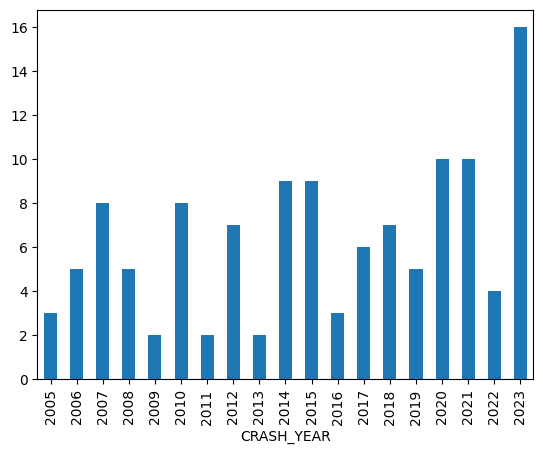

In [46]:
# filter for biycle death count
bicycle_death_filter = crash_data['BICYCLE_DEATH_COUNT']>0

# filter for serious bike injury
bicycle_serious_injury_filter = crash_data['BICYCLE_SUSP_SERIOUS_INJ_COUNT']>0

crash_data[bicycle_death_filter].groupby('CRASH_YEAR')['BICYCLE_DEATH_COUNT'].sum().plot(kind='bar')
plt.show()

In [47]:
bicycle_injuries = crash_data[bicycle_death_filter | bicycle_serious_injury_filter ]

In [48]:
bike_death_and_injury = bicycle_injuries.groupby('CRASH_YEAR')[['BICYCLE_DEATH_COUNT', 'BICYCLE_SUSP_SERIOUS_INJ_COUNT']].sum()
    
bike_death_and_injury


,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT
CRASH_YEAR,,
2005,3,21
2006,5,30
2007,8,35
2008,5,29
2009,2,32
2010,8,31
2011,2,25
2012,7,20
2013,2,33


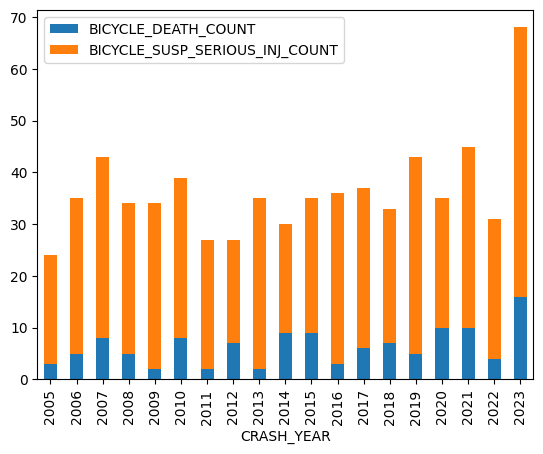

In [49]:
bike_death_and_injury.plot(stacked=True, kind='bar')
plt.show()

In [50]:
# filter for pedestrian accidents
ped_involved_filter = crash_data['PED_COUNT']>0

ped_accidents = crash_data[ped_involved_filter]
ped_accident_count = ped_accidents.groupby('CRASH_YEAR')[['PED_DEATH_COUNT', 'PED_SUSP_SERIOUS_INJ_COUNT']].sum()
    
ped_accident_count

,PED_DEATH_COUNT,PED_SUSP_SERIOUS_INJ_COUNT
CRASH_YEAR,,
2005,53,135
2006,66,141
2007,62,138
2008,51,126
2009,63,132
2010,46,149
2011,63,141
2012,66,137
2013,60,130


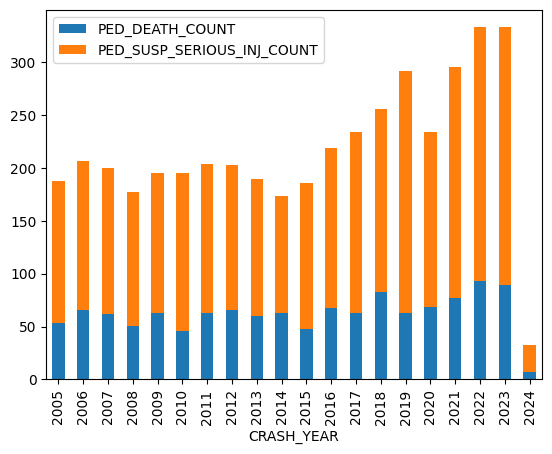

In [51]:
ped_accident_count.plot(stacked=True, kind='bar')
plt.show()

In [52]:
data_dictionary

,Column_Name,Description,Type,Length,Constraints
0,ARRIVAL_TM,Time police arrived at the scene,TEXT,4.0,HHMM
1,AUTOMOBILE_COUNT,Total amount of Automobiles Involved,NUMBER,2.0,NaN
2,BELTED_DEATH_COUNT,Total Deaths of belted occupants,NUMBER,2.0,NaN
3,BELTED_SUSP_SERIOUS_INJ_COUNT,Total Suspected Serious Injuries of belted occ...,NUMBER,2.0,NaN
4,BICYCLE_COUNT,Total amount of Bicycles involved,NUMBER,2.0,NaN
...,...,...,...,...,...
94,WZ_LN_CLOSURE,Did Work zone have a lane closure?,TEXT,1.0,"1=Y, 0 = N"
95,WZ_MOVING,Was there moving work in the zone?,TEXT,1.0,"1=Y, 0 = N"
96,WZ_OTHER,Was this a special type of work zone?,TEXT,1.0,"1=Y, 0 = N"
97,WZ_SHLDER_MDN,Was a median/shoulder in the zone?,TEXT,1.0,"1=Y, 0 = N"


### Geolocation

* There are two variables in the data set that recorded the geospatial position of the recorded crash incident:
  - `DEC_LATITUDE`
  - `DEC_LONGITUDE`

In [53]:
data_dictionary.set_index('Column_Name').loc[['DEC_LATITUDE', 'DEC_LONGITUDE']]

,Description,Type,Length,Constraints
Column_Name,,,,
DEC_LATITUDE,Decimal format of the Latitude,NUMBER,2.4,Latitude expressed in decimal degrees 99.9999
DEC_LONGITUDE,Decimal format of the Longitude,NUMBER,2.4,Longitude expressed in decimal degrees 99.9999


In [54]:
bicycle_injuries[['DEC_LATITUDE', 'DEC_LONGITUDE']]

,DEC_LATITUDE,DEC_LONGITUDE
1056,39.964656,-75.236198
5222,NaN,NaN
7065,39.867225,-75.377383
9223,39.923399,-75.299797
10257,40.196944,-75.115000
...,...,...
659242,39.981154,-75.831219
659576,40.149948,-75.230230
660165,39.981650,-75.283684
660582,39.829778,-75.393865


* If we plot these as a scatter plot you get an idea of how the data might be used to look for geospatial patterns

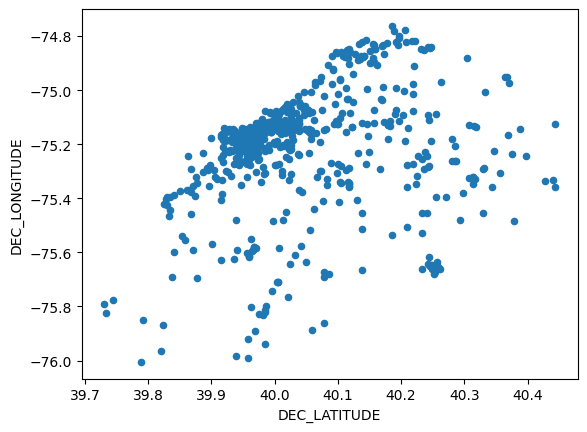

In [55]:
bicycle_injuries.plot(x='DEC_LATITUDE', y='DEC_LONGITUDE', kind='scatter')
plt.show()

#### Using a base layer

* Various `geojson` files are available that define shapes for regions like *states*, *counties*, *zip codes*, *census tracts*, etc.

In [56]:
philly_gdf = gpd.read_file('data/philadelphia_zip_boundaries.geojson')

<Axes: >

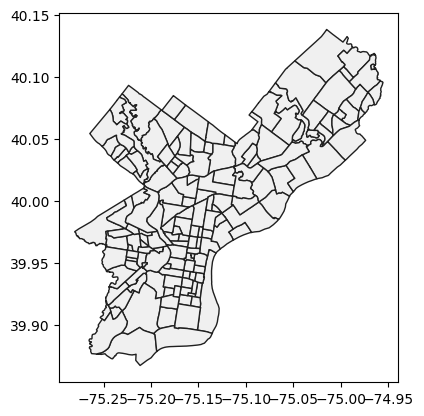

In [57]:
philly_gdf.plot(color='#F0F0F0', edgecolor='#202020')
#plt.show()

#### Converting a `pandas` data frame to a `geopandas` data frame
* But to make the best use of geolocation variables like `DEC_LATITUDE` and `DEC_LONGITUDE`, we need to translate them into a `geometry` data type.

In [58]:
geom=gpd.points_from_xy(bicycle_injuries['DEC_LONGITUDE'],
                  bicycle_injuries['DEC_LATITUDE']
                  )

bicycle_injuries_gdf=gpd.GeoDataFrame(bicycle_injuries, geometry=geom)

* Then we can combine both the base layer map and the points

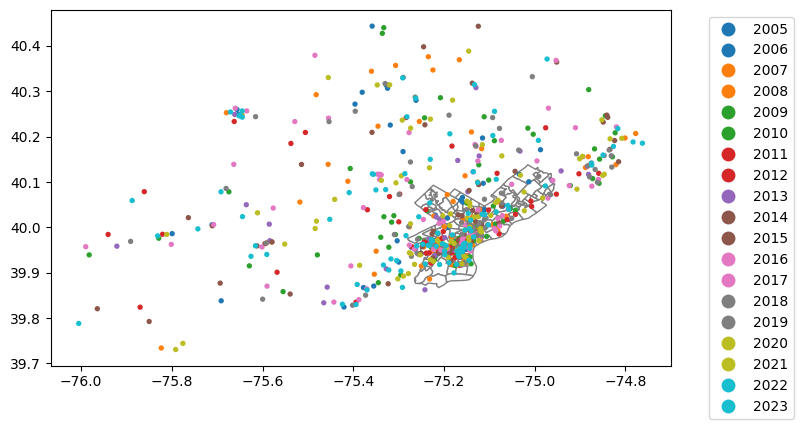

In [59]:
base=philly_gdf.plot(color='white', 
                     edgecolor='gray', figsize=(8,8))

bicycle_injuries_gdf.plot(ax=base, 
                          markersize=8, 
                          column='CRASH_YEAR', 
                          categorical=True, 
                          legend=True,
                          legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left'}
                         )

plt.show()

* Here we notice that we have a Philadelphia city map but data from DISTRICT 6 for the crash data.
* So we want to filter using `COUNTY` and value 67



In [60]:
phil_city_filter = bicycle_injuries_gdf['COUNTY']==67

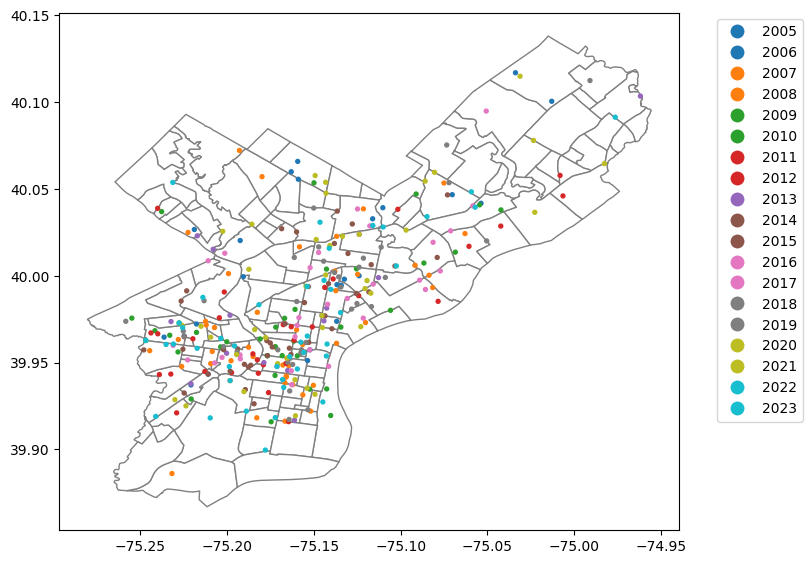

In [61]:
base=philly_gdf.plot(color='white', 
                     edgecolor='gray', figsize=(8,8))

bicycle_injuries_gdf[phil_city_filter].plot(ax=base, 
                          markersize=8, 
                          column='CRASH_YEAR', 
                          categorical=True, 
                          legend=True,
                          legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left'}
                         )

plt.show()

### Aggregating crash incidents by geospatial regions

* The point data shown above (and the categorical labels by color) are difficult make much sense of
* One of the powerful things you can do with `geopandas` is to aggregate data using the available geometry.
* This means you can do the equivalent of a **GROUP BY** operation using geolocation, e.g.
  - count the number of bicycle crash incidents by the zip code they occurred in

In [62]:
# filter bike injuries for just city and set CRS for geometry

phil_bicycle_injuries_gdf=bicycle_injuries_gdf[phil_city_filter].set_crs('EPSG:4326')

#### Spatial Joins

* A **SPATIAL JOIN** (`.sjoin`) allows you merge two geodataframes using a common spatial shape.
* Here we want to use the boundaries of zip codes to group together the latitude and longitude points for the crash incidents.

In [63]:
bgdf=gpd.sjoin(philly_gdf, phil_bicycle_injuries_gdf)

* This will give us a ZIP CODE reference for each incident
* But we actually want to count up the number of incidents per area
* To do this we use `.dissolve` function

In [64]:
bgdf2=bgdf.dissolve(by='listname', aggfunc='count')

bgdf2.sort_values('DISTRICT', ascending=False)[['geometry','name']].head()

,geometry,name
listname,,
University City,"POLYGON ((-75.17935 39.95822, -75.17935 39.957...",18
Logan Square,"POLYGON ((-75.1759 39.96418, -75.17444 39.9640...",12
Rittenhouse,"POLYGON ((-75.16876 39.94404, -75.17033 39.944...",11
Hunting Park,"POLYGON ((-75.12598 40.01386, -75.12234 40.013...",9
Haddington,"POLYGON ((-75.22457 39.96492, -75.22421 39.963...",9


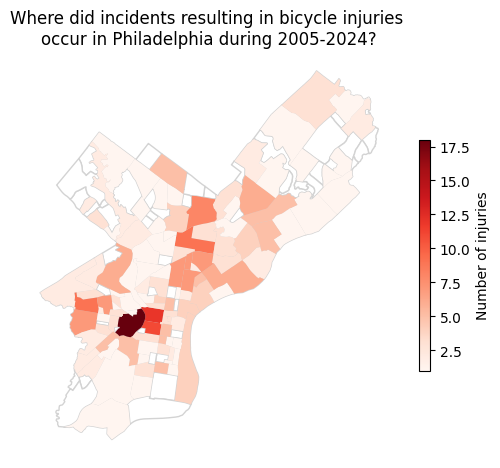

In [65]:
fig=philly_gdf.plot(color='white', 
                     edgecolor='lightgray', figsize=(6,6))

bgdf2.plot(ax=fig,column='name', cmap='Reds', 
           legend=True,
           legend_kwds={'shrink': 0.5, 
                        'label': 'Number of injuries'}     
          )
fig.axis('off')
fig.set_title('Where did incidents resulting in bicycle injuries \noccur in Philadelphia during 2005-2024?')

plt.show()


---

## Some (old) resources for use in looking for stories in these data

### News and other sites

* https://www.phillytrib.com/news/local_news/philly-s-riskiest-deadliest-roads-in-black-and-brown-neighborhoods/article_1d03b88e-2edf-5cbd-9f42-dd5eddf8fedf.html

* https://usa.streetsblog.org/2018/02/12/philadelphias-boulevard-of-death/

* https://billypenn.com/2017/02/06/how-roosevelt-boulevard-became-the-most-dangerous-road-in-philadelphia/

* KnowPA - infoviz example dashboards - http://www.knowpa.com/

### Legal firms citing crash data


> Roosevelt Boulevard, Philadelphia, Pennsylvania
> 
> While the other roads mentioned on this list are highways, Roosevelt Boulevard in Philadelphia is included because of its notoriety as one of the most dangerous thoroughfares in America. The boulevard consists of six 12-foot wide lanes in each direction, and drivers regularly exceed the posted 45 miles per hour and take the road’s dangerous curves far too fast. The boulevard also has two of the nation’s most dangerous intersections, where confused drivers frequently turn into the wrong three-lane stretch of traffic.

https://www.hg.org/legal-articles/5-of-the-most-dangerous-roads-in-the-u-s--32057

> Pennsylvania roads are dangerous, and with its large concentration of population, Philadelphia has the greatest number of crash-related deaths. In fact, according to PennDOT data on fatal car accidents, Philadelphia had more than a quarter of the road segments that were among the state’s most deadly from 2015-2017. During this period, Philly had 24 road segments with 155 total fatal collisions, leading to 167 deaths. This amounted to about a third of the segments with at least four deaths in the entire state.

https://www.wnwlaw.com/philly-four-pennsylvanias-ten-deadliest-roads/


* Study by law firm

https://www.dallashartman.com/blog/2019/01/deadly-roads-pa/